## 환경 설정

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import sys

#경고창이 뜨지 않도록 해주는 것
import warnings
warnings.filterwarnings('ignore')

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
%matplotlib inline 

**주피터 노트북에서 시각화할때, matplotlib가 한글 폰트 지원하지 않아, 깨짐 처리해줘야 함**

In [3]:
import platform                

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': #맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':#윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

# 데이터 불러오기 
- 데이터가 크다보니 속도가 오래걸리기도 합니다..!
- 아직 이런 문제를 해결하는 방법에 대한 에듀세션을 배우지 않았으니,
- 각자의 컴퓨터가 감당할 수 있는 만큼, 그리고 지금껏 에듀세션에서 배운 내용으로 최대한 성능개선을 해보시되, 
- 절대적인 accuracy 수치에 대해 부담은 갖지 않으셔도 됩니다! 몇 %라도 개선되었다면 좋습니다 ㅎㅎ

In [5]:
# 데이터 불러오기 
df = pd.read_csv('NYC_taxi.csv') # 파일경로 알맞게 지정해주세요 


# 여기 아래 부분 꼭 실행시켜주세요! 
df['pickup_hour'] = pd.to_datetime(df['pickup_hour'])
df['zip_code'] = df['zip_code'].astype(str) 




### 모델링할 때 램이 자꾸 터진다면... row 수, 즉 날짜를 줄이거나 특정 지역의 정보만 선택해서 넣으세요! 

In [ ]:
## 날짜 줄이기 
df = df.iloc[0:7000, :] #7000개만 남기기 

In [ ]:
##지역 수 줄이기 

zip_code_list = ['10001', '10002', '10115', '10026', '10027', '10029', '10030', '11797', '11801'] # 더 많은 지역을 포함해도 됩니다! 컴퓨터가 버틸 수 있을 만큼만..! 
df = df[df.zip_code.isin(zip_code_list)]
df = df.reset_index()
df = df.drop(['index'], axis = 1)

In [ ]:
df

,zip_code,pickup_hour,month,day,weekday,hour,is_weekend,cnt
0,11106,2015-01-01 00:00:00,1,1,3,0,0,75
1,10006,2015-01-01 00:00:00,1,1,3,0,0,64
2,11201,2015-01-01 00:00:00,1,1,3,0,0,169
3,11430,2015-01-01 00:00:00,1,1,3,0,0,222
4,10032,2015-01-01 00:00:00,1,1,3,0,0,64
5,10075,2015-01-01 00:00:00,1,1,3,0,0,444
6,10069,2015-01-01 00:00:00,1,1,3,0,0,37
7,10001,2015-01-01 00:00:00,1,1,3,0,0,1221
8,10019,2015-01-01 00:00:00,1,1,3,0,0,1367
9,11216,2015-01-01 00:00:00,1,1,3,0,0,37


# 데이터 전처리 
### (전처리 파일을 복붙해오시고, 모델별로 다르게 적용하실때마다 복붙해서 사용하시면 되겠습니다) 

### 모델링을 위한 기본 전처리
  - `기본 정보 확인 (결측치 및 이상치 처리)`
      - df.info()
      - df.describe()
      - 간단한 시각화 
  - `시간 관련 전처리 (새로운 열 생성)` 
      - DATETIME에서 MONTH, HOUR, WEEKDAY 등 추출
  - `Categorical 데이터 전처리`
      - One Hot Encoding
      - Label Encoding
  - `Train / Test Split`
    - NY taxi data에서 주의점 

### 기본 정보 확인 (결측치 및 이상치 처리) 
  - df.info()
  - df.describe()
  - 간단한 시각화 



---


EDA 과정에서 기본적으로 다 확인하셨죠? ㅎㅎ 
EDA 결과 중 모델링에 적용하기로한 부분이 있다면 반영해주세요~!

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   zip_code     7000 non-null   object        
 1   pickup_hour  7000 non-null   datetime64[ns]
 2   month        7000 non-null   int64         
 3   day          7000 non-null   int64         
 4   weekday      7000 non-null   int64         
 5   hour         7000 non-null   int64         
 6   is_weekend   7000 non-null   int64         
 7   cnt          7000 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 437.6+ KB


### column을 바꾸어서 modeling

- df['cnt']가 중간값보다 크면 survive(1), df['cnt']가 중간값보다 작으면 death(0 )중간값보다 call이 많이 들어오는 시간대와 장소인지를 알려주는 column인 'togo'를 만들고 이를 바탕으로 classification, 이를 활용해 그 시간대, 그 지역에 택시가 그쪽으로 갈지말지 판단할 수 있다. 


- 중간값을 사용한 이유: df['cnt']의 분포를 보면 outlier들이 매우 많기 때문에 평균값은 전체 콜을 받은 시간대 중에 상당히 실적이 좋은 콜 수라고 볼 수 있다. 그러므로 평균값보다 중간값을 기준으로 삼는 것이 나아보인다.

In [7]:
df['cnt'].describe()

count    7000.000000
mean      112.319571
std       241.395757
min         1.000000
25%         2.000000
50%        11.000000
75%        71.000000
max      2011.000000
Name: cnt, dtype: float64

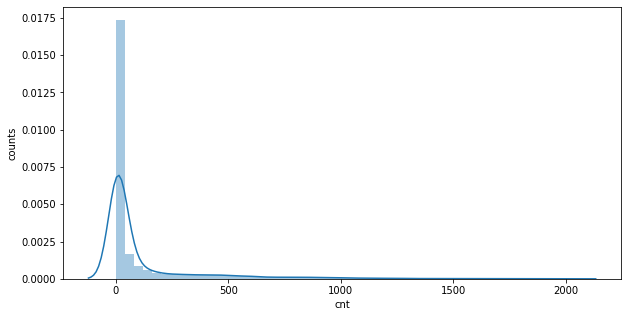

In [8]:
plt.figure(figsize=(10,5))
dist=sns.distplot(df['cnt'])
dist.set_xlabel("cnt")
dist.set_ylabel("counts")
plt.show() 

이상치가 많기 때문에 taxi가 그 시간, 그 장소에 그 지역으로 움직일지 판단할 때 togo or not을 판단할 때 평균값이 아닌 중간값을 활용한다. 

In [9]:
df['cnt'].quantile(0.5)

11.0

In [10]:
df['togo'] = np.where(df['cnt']>=df['cnt'].median(), 1, 0)

In [11]:
df.tail()

,zip_code,pickup_hour,month,day,weekday,hour,is_weekend,cnt,togo
6995,11368,2015-01-03 08:00:00,1,3,5,8,1,1,0
6996,11743,2015-01-03 08:00:00,1,3,5,8,1,1,0
6997,10024,2015-01-03 08:00:00,1,3,5,8,1,214,1
6998,11231,2015-01-03 08:00:00,1,3,5,8,1,45,1
6999,10035,2015-01-03 08:00:00,1,3,5,8,1,52,1


In [12]:
del df['cnt']

In [13]:
df.tail()

,zip_code,pickup_hour,month,day,weekday,hour,is_weekend,togo
6995,11368,2015-01-03 08:00:00,1,3,5,8,1,0
6996,11743,2015-01-03 08:00:00,1,3,5,8,1,0
6997,10024,2015-01-03 08:00:00,1,3,5,8,1,1
6998,11231,2015-01-03 08:00:00,1,3,5,8,1,1
6999,10035,2015-01-03 08:00:00,1,3,5,8,1,1


### `Categorical 데이터 전처리`

기본적으로 사이킷런의 머신러닝 알고리즘은 문자열 값을 입력 값으로 허락하지 않습니다. 또한, 먆은 알고리즘이 범주형 데이터로 직접 작동할 수 없습니다. 그렇기 때문에 모든 문자열 값들을 숫자 형으로 인코딩하는 전처리 작업 후에 머신러닝 모델에 학습을 시켜야하는데요. 이렇게 인코딩 하는 방식에는 크게 레이블 인코딩(Lable encoding)과 원-핫 인코딩(One Hot Encoding)이 있습니다. 

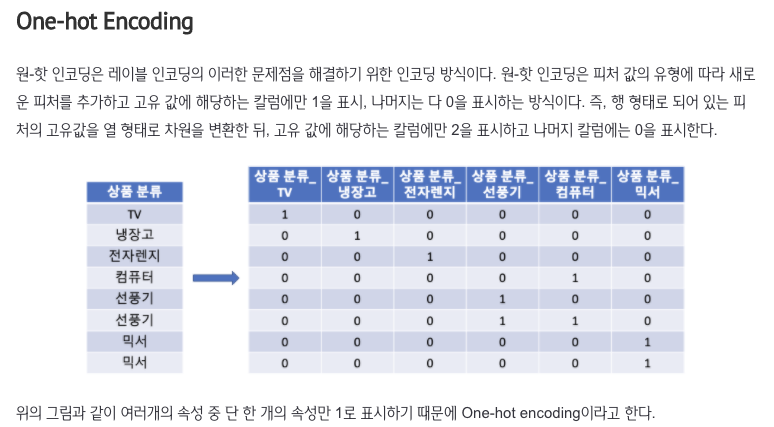

In [14]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [15]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df[['zip_code']])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=True)

In [16]:
ohe_output = enc.transform(df[['zip_code']]).toarray()
oh_feature_df = pd.concat([df, pd.DataFrame(ohe_output, columns='zip_code_'+ enc.categories_[0])], axis=1)
oh_feature_df.head(3)

,zip_code,pickup_hour,month,day,weekday,hour,is_weekend,togo,zip_code_10001,zip_code_10002,zip_code_10003,zip_code_10004,zip_code_10005,zip_code_10006,zip_code_10007,zip_code_10009,zip_code_10010,zip_code_10011,zip_code_10012,zip_code_10013,zip_code_10014,zip_code_10016,zip_code_10017,zip_code_10018,zip_code_10019,zip_code_10020,zip_code_10021,zip_code_10022,zip_code_10023,zip_code_10024,zip_code_10025,zip_code_10026,zip_code_10027,zip_code_10028,zip_code_10029,zip_code_10030,zip_code_10031,zip_code_10032,zip_code_10033,zip_code_10034,...,zip_code_11427,zip_code_11428,zip_code_11429,zip_code_11430,zip_code_11432,zip_code_11433,zip_code_11434,zip_code_11435,zip_code_11436,zip_code_11514,zip_code_11530,zip_code_11550,zip_code_11552,zip_code_11553,zip_code_11560,zip_code_11561,zip_code_11563,zip_code_11570,zip_code_11577,zip_code_11580,zip_code_11581,zip_code_11590,zip_code_11691,zip_code_11692,zip_code_11693,zip_code_11694,zip_code_11717,zip_code_11735,zip_code_11743,zip_code_11749,zip_code_11756,zip_code_11783,zip_code_11788,zip_code_11793,zip_code_11795,zip_code_11801,zip_code_11803,zip_code_12052,zip_code_12569,zip_code_12771
0,11106,2015-01-01,1,1,3,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10006,2015-01-01,1,1,3,0,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11201,2015-01-01,1,1,3,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- Label Encoding



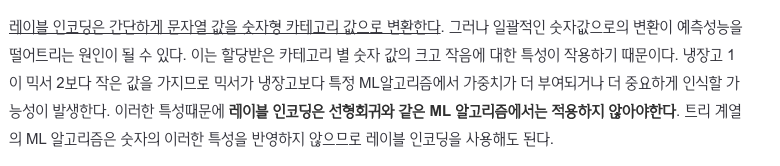

In [17]:
 
le = LabelEncoder()
le.fit(df['zip_code'])
df['zip_code_le'] = le.transform(df['zip_code'])

### Train and Test Split
- 시계열 데이터는 Random Sampling을 하면 안됨
- Train엔 과거 데이터, Test엔 (과거 대비) 미래 데이터가 있어야 함
    - 만약 Train에 미래 데이터가 있다면? 미래를 보고 과거를 예측한 꼴
    - 실제로 사용할 땐 과거 데이터 기반으로 미래 데이터를 예측

In [18]:
def split_train_and_test(df, date):
    """
    Dataframe에서 train_df, test_df로 나눠주는 함수
    
    df : 시계열 데이터 프레임
    date : 기준점 날짜
    """
    train_df = df[df['pickup_hour'] < date]
    test_df = df[df['pickup_hour'] >= date]
    return train_df, test_df

- 위 방법은 명시적으로 date를 지정하는 방법이 마음에 들지 않을수도 있음
    - 이럴 경우 Dataframe의 시간 데이터를 마지막 1주치만 Test로 지정할 수 있음

In [19]:
def split_train_and_test_period(df, period):
    """
    Dataframe에서 train_df, test_df로 나눠주는 함수
    
    df : 시계열 데이터 프레임
    period : train/test 기준 일
    """
    criteria = (max(df['pickup_hour']) - pd.Timedelta(days=period)).date()
    train_df = df[df['pickup_hour'] < criteria]
    test_df = df[df['pickup_hour'] >= criteria]
    return train_df, test_df

### Train / Test 나누기

In [ ]:
# train_df, test_df = split_train_and_test(oh_feature_df, '2015-01-24') # 원핫인코딩

In [22]:
train_df, test_df = split_train_and_test(df, '2015-01-03') #라벨인코딩 #5일만 train 시키기


In [23]:
train_df

,zip_code,pickup_hour,month,day,weekday,hour,is_weekend,togo,zip_code_le
0,11106,2015-01-01 00:00:00,1,1,3,0,0,1,136
1,10006,2015-01-01 00:00:00,1,1,3,0,0,1,5
2,11201,2015-01-01 00:00:00,1,1,3,0,0,1,138
3,11430,2015-01-01 00:00:00,1,1,3,0,0,1,218
4,10032,2015-01-01 00:00:00,1,1,3,0,0,1,29
...,...,...,...,...,...,...,...,...,...
5947,11432,2015-01-02 23:00:00,1,2,4,23,0,0,219
5948,12052,2015-01-02 23:00:00,1,2,4,23,0,0,252
5949,10111,2015-01-02 23:00:00,1,2,4,23,0,1,44
5950,11226,2015-01-02 23:00:00,1,2,4,23,0,0,162


In [25]:
test_df

,zip_code,pickup_hour,month,day,weekday,hour,is_weekend,togo,zip_code_le
5952,11430,2015-01-03 00:00:00,1,3,5,0,1,1,218
5953,10119,2015-01-03 00:00:00,1,3,5,0,1,1,47
5954,10075,2015-01-03 00:00:00,1,3,5,0,1,1,41
5955,10002,2015-01-03 00:00:00,1,3,5,0,1,1,1
5956,10128,2015-01-03 00:00:00,1,3,5,0,1,1,48
...,...,...,...,...,...,...,...,...,...
6995,11368,2015-01-03 08:00:00,1,3,5,8,1,0,187
6996,11743,2015-01-03 08:00:00,1,3,5,8,1,0,243
6997,10024,2015-01-03 08:00:00,1,3,5,8,1,1,21
6998,11231,2015-01-03 08:00:00,1,3,5,8,1,1,166


In [26]:
del train_df['zip_code']
del train_df['pickup_hour']
del test_df['zip_code']
del test_df['pickup_hour']
# del train_df['zip_code_le']
# del test_df['zip_code_le']

In [27]:
train_df

,month,day,weekday,hour,is_weekend,togo,zip_code_le
0,1,1,3,0,0,1,136
1,1,1,3,0,0,1,5
2,1,1,3,0,0,1,138
3,1,1,3,0,0,1,218
4,1,1,3,0,0,1,29
...,...,...,...,...,...,...,...
5947,1,2,4,23,0,0,219
5948,1,2,4,23,0,0,252
5949,1,2,4,23,0,1,44
5950,1,2,4,23,0,0,162


In [28]:
y_train = train_df.pop('togo')
x_train = train_df.copy()

In [29]:
y_test = test_df.pop('togo')
x_test = test_df.copy()

In [30]:
x_train

,month,day,weekday,hour,is_weekend,zip_code_le
0,1,1,3,0,0,136
1,1,1,3,0,0,5
2,1,1,3,0,0,138
3,1,1,3,0,0,218
4,1,1,3,0,0,29
...,...,...,...,...,...,...
5947,1,2,4,23,0,219
5948,1,2,4,23,0,252
5949,1,2,4,23,0,44
5950,1,2,4,23,0,162


In [31]:
y_train

0       1
1       1
2       1
3       1
4       1
       ..
5947    0
5948    0
5949    1
5950    0
5951    0
Name: togo, Length: 5952, dtype: int64

In [32]:
x_test

,month,day,weekday,hour,is_weekend,zip_code_le
5952,1,3,5,0,1,218
5953,1,3,5,0,1,47
5954,1,3,5,0,1,41
5955,1,3,5,0,1,1
5956,1,3,5,0,1,48
...,...,...,...,...,...,...
6995,1,3,5,8,1,187
6996,1,3,5,8,1,243
6997,1,3,5,8,1,21
6998,1,3,5,8,1,166


In [33]:
y_test

5952    1
5953    1
5954    1
5955    1
5956    1
       ..
6995    0
6996    0
6997    1
6998    1
6999    1
Name: togo, Length: 1048, dtype: int64

# 모델링

 


### svm 적용

In [34]:
from sklearn import svm

clf = svm.SVC(C=1, kernel='rbf', gamma = 'scale') 

clf.fit(x_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
train_prediction = clf.predict(x_train)
test_prediction = clf.predict(x_test)

from sklearn.metrics import accuracy_score

print("Train Accuracy:", round(accuracy_score(y_train, train_prediction),2))
print("Test Accuracy:", round(accuracy_score(y_test, test_prediction),2))

Train Accuracy: 0.73
Test Accuracy: 0.74


Stratified k-fold cross-validation

In [36]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [37]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2020)

In [42]:
scores = cross_val_score(clf, x_data, y_data, cv=skf)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.73


Hyperparameter 튜닝으로 svm accuracy 개선 / grid search

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [40]:
C_range = [0.1,1,10,100]
gamma_range = [1,0.1,0.01,0.001]

In [41]:
x_data = pd.concat([x_train, x_test])
y_data = pd.concat([y_train, y_test])

In [43]:
param_grid = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(x_data, y_data)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [44]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 1, 'gamma': 0.1} with a score of 0.78


In [45]:
clf = svm.SVC(C=10, kernel='rbf', gamma = 0.1) 

clf.fit(x_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
train_prediction = clf.predict(x_train)
test_prediction = clf.predict(x_test)

from sklearn.metrics import accuracy_score

print("Train Accuracy:", round(accuracy_score(y_train, train_prediction),2))
print("Test Accuracy:", round(accuracy_score(y_test, test_prediction),2))

Train Accuracy: 0.91
Test Accuracy: 0.8


Stratified k-fold cross-validation

In [47]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2020)

In [48]:
scores = cross_val_score(clf, x_data, y_data, cv=skf)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.85
